Starting hyperparameter tuning for scikit-learn models...
Tuned RandomForestClassifier - Best params: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned DecisionTreeClassifier - Best params: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned LogisticRegression - Best params: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned SVC - Best params: {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned KNeighborsClassifier - Best params: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

==================== Evaluating Random Forest ====================
Accuracy: 0.7567
ROC AUC: 0.8295
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       583
           1       0.76      0.77      0.77       617

    accuracy                           0.76      1200
   macro 

C:\Users\Rajesh Kaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
C:\Users\Rajesh Kaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


Accuracy: 0.7675
ROC AUC: 0.8415
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       583
           1       0.79      0.75      0.77       617

    accuracy                           0.77      1200
   macro avg       0.77      0.77      0.77      1200
weighted avg       0.77      0.77      0.77      1200

Confusion Matrix:
[[457 126]
 [153 464]]
5-Fold CV Accuracy: 0.7442 ± 0.0097

==================== Evaluating SVM ====================


C:\Users\Rajesh Kaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


Accuracy: 0.7708
ROC AUC: 0.8348
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       583
           1       0.77      0.79      0.78       617

    accuracy                           0.77      1200
   macro avg       0.77      0.77      0.77      1200
weighted avg       0.77      0.77      0.77      1200

Confusion Matrix:
[[439 144]
 [131 486]]
5-Fold CV Accuracy: 0.7493 ± 0.0087

==================== Evaluating KNN ====================
Accuracy: 0.7275
ROC AUC: 0.7883
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       583
           1       0.74      0.73      0.73       617

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200

Confusion Matrix:
[[424 159]
 [168 449]]
5-Fold CV Accuracy: 0.7150 ± 0.0100

==================== 

C:\Users\Rajesh Kaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
C:\Users\Rajesh Kaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


Accuracy: 0.7592
ROC AUC: 0.8344
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       583
           1       0.77      0.76      0.76       617

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200

Confusion Matrix:
[[441 142]
 [147 470]]
5-Fold CV Accuracy: 0.7425 ± 0.0088


C:\Users\Rajesh Kaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

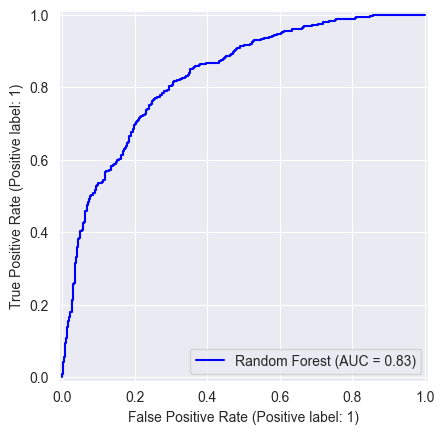

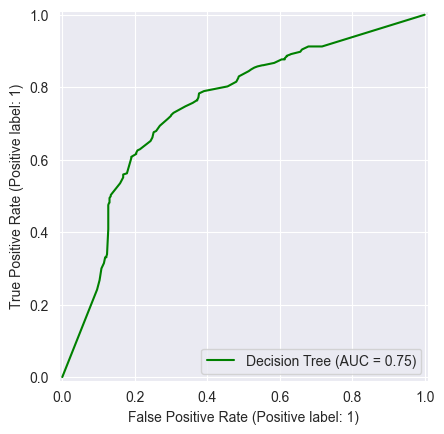

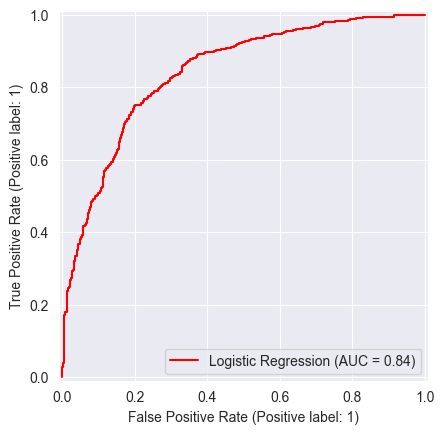

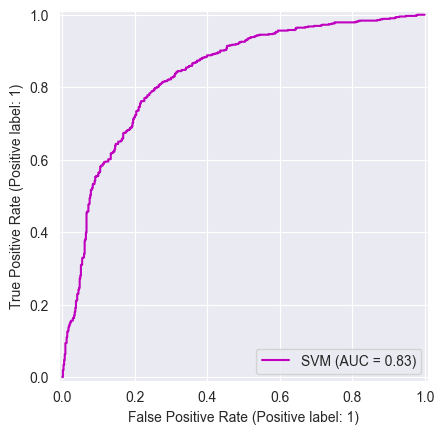

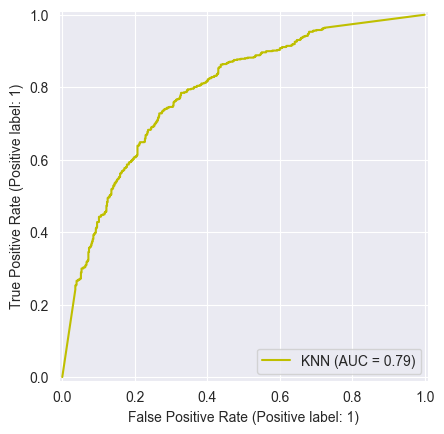

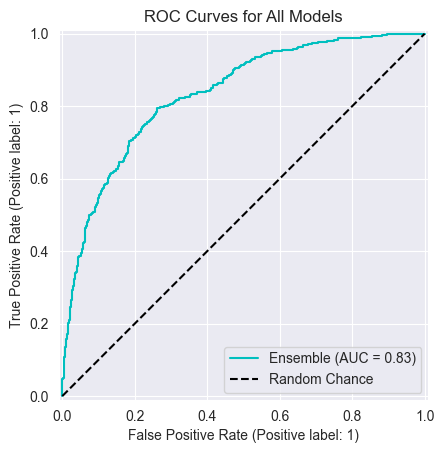

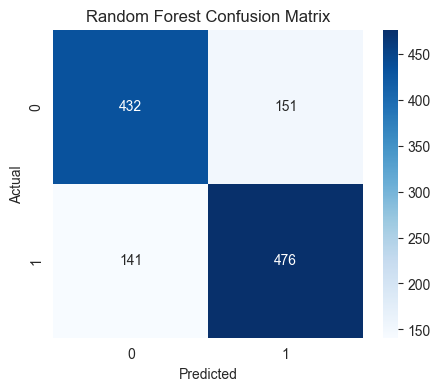

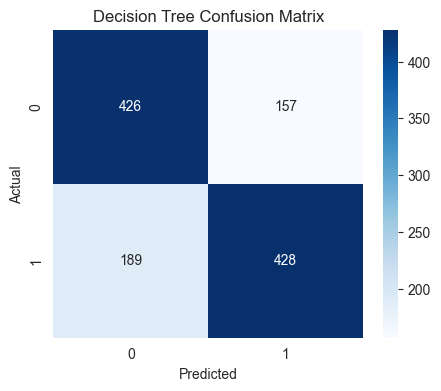

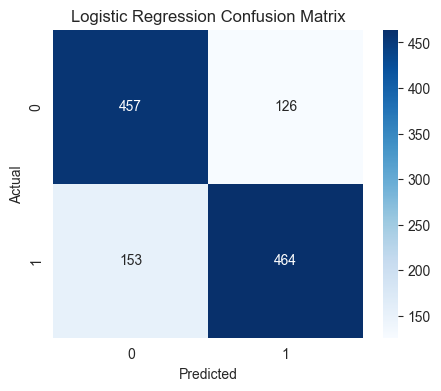

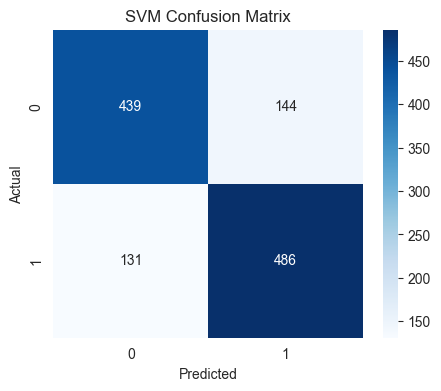

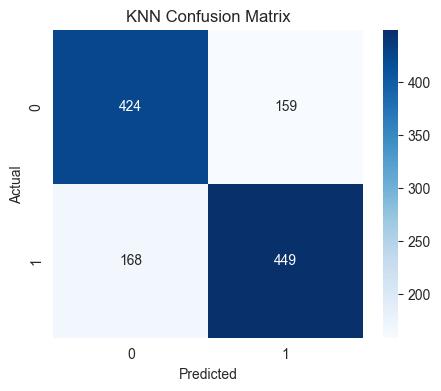

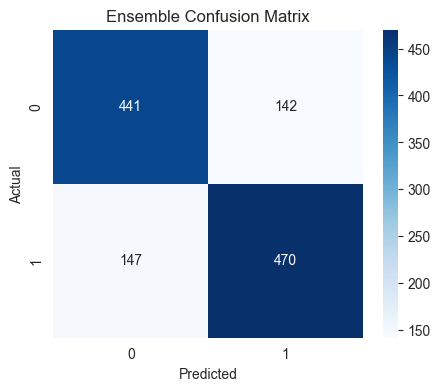


Summary of Model Performance

                 Model  Test Accuracy   ROC AUC  CV Accuracy Mean  \
0                  SVM       0.770833  0.834822          0.749333   
1  Logistic Regression       0.767500  0.841470          0.744167   
2             Ensemble       0.759167  0.834403          0.742500   
3        Random Forest       0.756667  0.829452          0.738667   
4                  KNN       0.727500  0.788326          0.715000   
5        Decision Tree       0.710833  0.745539          0.698833   

   CV Accuracy Std  
0         0.008683  
1         0.009675  
2         0.008835  
3         0.006964  
4         0.009986  
5         0.012300  


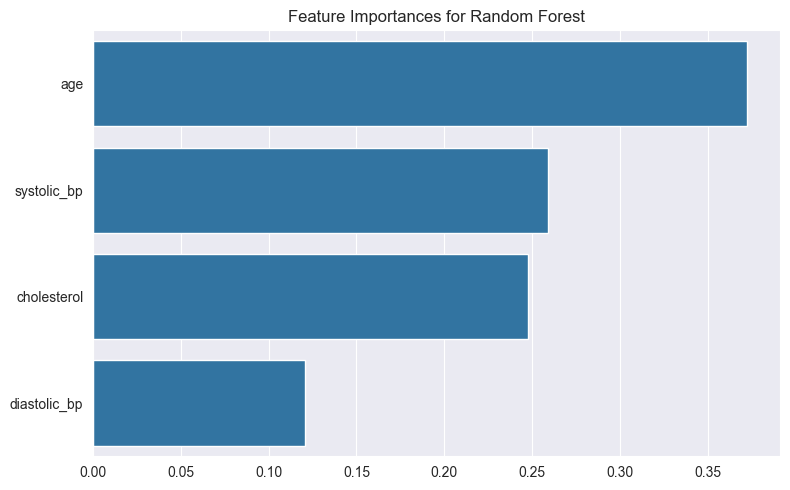

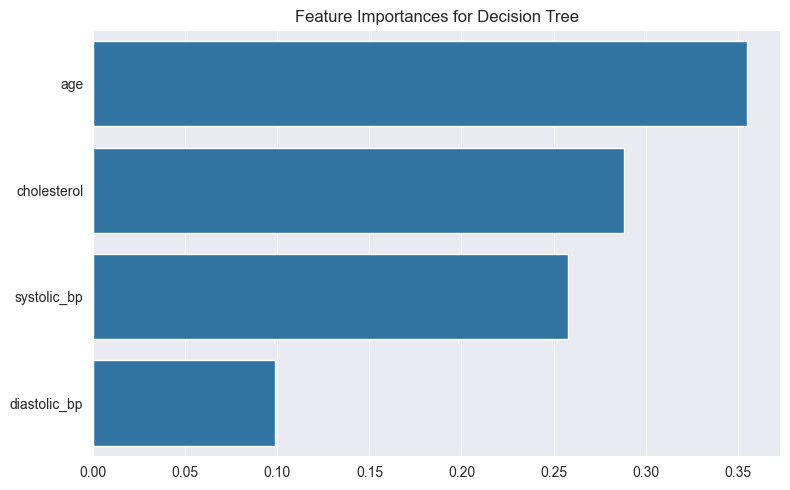


Best performing model: SVM


In [7]:
# ------------------- Import Libraries -------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# ------------------- Load and Prepare Data ---------------
df = df = pd.read_csv("pronostico_dataset.csv", sep=';')
df = df.dropna()
df = df.drop(columns=['ID'])
df['prognosis'] = (
    df['prognosis']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'retinopathy': 1, 'no_retinopathy': 0})
)

X = df.drop(columns=['prognosis'])
y = df['prognosis']

# ------------------- Train-Test Split --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------- Feature Scaling for SVM, KNN, Ensemble ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------ Hyperparameter Grids -----------------
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': [None, 'balanced']
}
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

# ------------- Hyperparameter Tuning Function -------------
def tune_model(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Tuned {model.__class__.__name__} - Best params: {grid.best_params_}")
    return grid.best_estimator_

print("Starting hyperparameter tuning for scikit-learn models...")
rf_best = tune_model(RandomForestClassifier(random_state=42), rf_params, X_train, y_train)
dt_best = tune_model(DecisionTreeClassifier(random_state=42), dt_params, X_train, y_train)
lr_best = tune_model(LogisticRegression(max_iter=1000, random_state=42), lr_params, X_train, y_train)
svm_best = tune_model(SVC(probability=True, random_state=42), svm_params, X_train_scaled, y_train)
knn_best = tune_model(KNeighborsClassifier(), knn_params, X_train_scaled, y_train)

# -------------------- Ensemble Model ----------------------
ensemble = VotingClassifier(
    estimators=[('rf', rf_best), ('dt', dt_best), ('lr', lr_best), ('svm', svm_best), ('knn', knn_best)],
    voting='soft'
)
ensemble.fit(X_train_scaled, y_train)

# ------------------ Models Dictionary ---------------------
models = {
    'Random Forest': rf_best,
    'Decision Tree': dt_best,
    'Logistic Regression': lr_best,
    'SVM': svm_best,
    'KNN': knn_best,
    'Ensemble': ensemble
}

# -------------- Evaluation & Visualization ----------------
results = []
plt.figure(figsize=(10, 8))
model_colors = ['b', 'g', 'r', 'm', 'y', 'c']

for i, (name, model) in enumerate(models.items()):
    print(f"\n{'='*20} Evaluating {name} {'='*20}")
    # Determine input data type
    X_eval = X_test_scaled if name in ['SVM', 'KNN', 'Ensemble'] else X_test
    
    # Get predictions
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_eval)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)  # Threshold at 0.5
    else:
        y_pred = model.predict(X_eval)
        y_proba = None
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Print and store results
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {auc:.4f}" if not np.isnan(auc) else "ROC AUC: N/A")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    results.append({
        'Model': name,
        'Test Accuracy': acc,
        'ROC AUC': auc,
        'CV Accuracy Mean': cv_scores.mean(),
        'CV Accuracy Std': cv_scores.std()
    })

    # Plot ROC curve if applicable
    if not np.isnan(auc):
        RocCurveDisplay.from_predictions(
            y_test,
            y_proba,
            name=name,
            color=model_colors[i % len(model_colors)]
        )

plt.title("ROC Curves for All Models")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.legend()
plt.show()

# Confusion matrices
for name, model in models.items():
    X_eval = X_test_scaled if name in ['SVM', 'KNN', 'Ensemble'] else X_test
    y_pred = model.predict(X_eval)
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Summary table
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)
print("\n" + "=" * 40)
print("Summary of Model Performance\n")
print(results_df[['Model', 'Test Accuracy', 'ROC AUC', 'CV Accuracy Mean', 'CV Accuracy Std']])
print("=" * 40)

# Feature importance visualization for Tree models
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8, 5))
    plt.title(f'Feature Importances for {model_name}')
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
    plt.tight_layout()
    plt.show()

if hasattr(rf_best, "feature_importances_"):
    plot_feature_importance(rf_best, X.columns, "Random Forest")
if hasattr(dt_best, "feature_importances_"):
    plot_feature_importance(dt_best, X.columns, "Decision Tree")

# Best model print and save
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest performing model: {best_model_name}")

import joblib
joblib.dump(models['Random Forest'], f"Random Forest.pkl")
joblib.dump(models['Decision Tree'], f"Decision Tree.pkl")
joblib.dump(models['Logistic Regression'], f" Ensemble.pkl")
joblib.dump(models['SVM'], f"svm.pkl")
joblib.dump(models['KNN'], f"knn.pkl")
joblib.dump(models['Ensemble'], f"ensemble.pkl")
joblib.dump(models[best_model_name], f"{best_model_name}_best_model.pkl")
def predict_prognosis(input_data, model_name, scaler=None):
    """
    Predict prognosis (retinopathy or not) based on input features.

    Parameters:
    - input_data: dict of feature values. e.g., {'age': 45, 'systol': 130, ...}
    - model_name: name of the saved model (e.g., 'Ensemble')
    - scaler: StandardScaler object if scaling is required

    Returns:
    - Prediction (0 = no retinopathy, 1 = retinopathy)
    """
    # Load the model
    model = joblib.load(f"{model_name}_best_model.pkl")

    # Convert input dict to DataFrame
    input_df = pd.DataFrame([input_data])

    # Apply scaling if model requires it
    if model_name in ['SVM', 'KNN', 'Ensemble'] and scaler is not None:
        input_scaled = scaler.transform(input_df)
        pred = model.predict(input_scaled)
    else:
        pred = model.predict(input_df)

    # Return prediction
    return "Retinopathy" if pred[0] == 1 else "No Retinopathy"



In [8]:
import joblib

def predict_prognosis(input_data, model_name, scaler):
    """
    Predict prognosis (retinopathy or not) based on input features.

    input_data: dict with keys 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol'
    model_name: string, must match saved model filename prefix like 'Random Forest' or 'Ensemble'
    scaler: the StandardScaler fit used during training
    
    Returns string: "Retinopathy" or "No Retinopathy"
    """
    # Load the trained model
    model = joblib.load(f"{model_name}_best_model.pkl")

    # Convert input dictionary to DataFrame with correct columns order
    full_features = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']
    input_df = pd.DataFrame([input_data])
    input_df = input_df[full_features]

    # Scale input if model requires it (SVM, KNN, Ensemble)
    if model_name in ['SVM', 'KNN', 'Ensemble'] and scaler is not None:
        input_scaled = scaler.transform(input_df)
        pred = model.predict(input_scaled)
    else:
        pred = model.predict(input_df)

    return "Retinopathy" if pred[0] == 1 else "No Retinopathy"


# Example usage:

input_sample = {
    'age': 45,
    'systolic_bp': 130,
    'diastolic_bp': 90,
    'cholesterol':68
}

result = predict_prognosis(input_sample, model_name=best_model_name, scaler=scaler)
print("Prediction result:", result)


Prediction result: No Retinopathy


In [9]:
import os, json, joblib, numpy as np, pandas as pd, streamlit as st
from sklearn.pipeline import Pipeline

st.set_page_config(page_title="Retinopathy Predictor", page_icon="🩺")

# Load feature list (fallback: infer from CSV)
features = None
if os.path.exists("feature_names.json"):
    features = json.load(open("feature_names.json"))
elif os.path.exists("pronostico_dataset.csv"):
    df = pd.read_csv("pronostico_dataset.csv", sep=";")
    if "prognosis" in df.columns: df = df.drop(columns=["prognosis"])
    if "ID" in df.columns: df = df.drop(columns=["ID"])
    features = df.columns.tolist()
else:
    st.error("Can't find feature_names.json or pronostico_dataset.csv to infer inputs.")
    st.stop()

# Pick a model file
pkl_files = [f for f in os.listdir(".") if f.lower().endswith(".pkl") or f.lower().endswith(".joblib")]
model_file = st.sidebar.selectbox("Pick a model file", sorted(pkl_files), index=max(0, pkl_files.index("SVM_best_model.pkl")) if "SVM_best_model.pkl" in pkl_files else 0)

# Optional scaler (only used if model is not a pipeline and needs scaling)
scaler = joblib.load("scaler.pkl") if os.path.exists("scaler.pkl") else None

st.title("🩺 Diabetic Retinopathy Prediction")
st.write("Fill the inputs and click **Predict**.")

# Build inputs (defaults = median from CSV if available)
defaults = {}
if os.path.exists("pronostico_dataset.csv"):
    df = pd.read_csv("pronostico_dataset.csv", sep=";")
    defaults = df.drop(columns=[c for c in ["prognosis","ID"] if c in df.columns]).median(numeric_only=True).to_dict()

vals = {}
cols = st.columns(2)
for i, f in enumerate(features):
    with cols[i % 2]:
        vals[f] = st.number_input(f, value=float(defaults.get(f, 0.0)))

if st.button("Predict"):
    model = joblib.load(model_file)
    X = pd.DataFrame([[vals[c] for c in features]], columns=features)

    # If it's a pipeline, it already knows how to preprocess.
    is_pipeline = isinstance(model, Pipeline)

    # Heuristic: scale only if not a pipeline and scaler exists and model likely needs scaling
    needs_scale = (("svm" in model_file.lower()) or ("knn" in model_file.lower())) and (not is_pipeline) and (scaler is not None)
    if needs_scale:
        X = scaler.transform(X)

    pred = int(model.predict(X)[0])
    proba = None
    if hasattr(model, "predict_proba"):
        proba = float(model.predict_proba(X)[0,1])

    st.success(f"Prediction: **{'Retinopathy' if pred==1 else 'No Retinopathy'}**")
    if proba is not None:
        st.write(f"Estimated probability of retinopathy: **{proba:.3f}**")


2025-08-13 16:48:54.270 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 16:48:54.284 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 16:48:54.285 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 16:48:54.286 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 16:48:54.286 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-13 16:48:54.287 WARNING streamlit.run